# Table of Contents

1. [Data Cleaning](#data-cleaning)
    1. [Handling Missing Values](#handling-missing-values)
    2. [Scaling and Normalization](#scaling-and-normalization)
    3. [Parsing Dates](#parsing-dates)
    4. [Character Encodings](#character-encodings)
    5. [Inconsistent Data Entry](#inconsistent-data-entry)


# Data Cleaning

## Handling Missing Values

In [8]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

Dataset can be found [here](https://www.kaggle.com/code/alexisbcook/handling-missing-values/tutorial#:~:text=nflplaybyplay2009to2016)

In [2]:
data = {
    "Date": ["2009-09-10"] * 5,
    "GameID": ["2009091000"] * 5,
    "Drive": [1] * 5,
    "qtr": [1] * 5,
    "down": [np.nan, 1, 2, 3, 4],
    "time": ["15:00", "14:53", "14:16", "13:35", "13:27"],
    "TimeUnder": [15] * 5,
    "TimeSecs": [3600.0, 3593.0, 3556.0, 3515.0, 3507.0],
    "PlayTimeDiff": [0.0, 7.0, 37.0, 41.0, 8.0],
    "SideofField": ["TEN", "PIT", "PIT", "PIT", "PIT"],
    "yacEPA": [np.nan, 1.146076, np.nan, -5.031425, np.nan],
    "Home_WP_pre": [0.485675, 0.546433, 0.551088, 0.510793, 0.461217],
    "Away_WP_pre": [0.514325, 0.453567, 0.448912, 0.489207, 0.538783],
    "Home_WP_post": [0.546433, 0.551088, 0.510793, 0.461217, 0.558929],
    "Away_WP_post": [0.453567, 0.448912, 0.489207, 0.538783, 0.441071],
    "Win_Prob": [0.485675, 0.546433, 0.551088, 0.510793, 0.461217],
    "WPA": [0.060758, 0.004655, -0.040295, -0.049576, 0.097712],
    "airWPA": [np.nan, -0.032244, np.nan, 0.106663, np.nan],
    "yacWPA": [np.nan, 0.036899, np.nan, -0.156239, np.nan],
    "Season": [2009] * 5,
}

nfl_data = pd.DataFrame(data)
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,15,3515.0,41.0,PIT,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,15,3507.0,8.0,PIT,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
missing_values_count = nfl_data.isna().sum()
print(f"Total number of missing values in the dataset: {missing_values_count.sum()}")
missing_values_count

Total number of missing values in the dataset: 10


Date            0
GameID          0
Drive           0
qtr             0
down            1
time            0
TimeUnder       0
TimeSecs        0
PlayTimeDiff    0
SideofField     0
yacEPA          3
Home_WP_pre     0
Away_WP_pre     0
Home_WP_post    0
Away_WP_post    0
Win_Prob        0
WPA             0
airWPA          3
yacWPA          3
Season          0
dtype: int64

In [4]:
# how many total missing values do we have?
total_cells = np.prod(
    nfl_data.shape
)  # np.prod returns the product of all elements in the input
print(f"Total cells in the dataset with a shape of {nfl_data.shape} is: {total_cells}")
print(f"Total cells in the dataset: {total_cells}")
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

Total cells in the dataset with a shape of (5, 20) is: 100
Total cells in the dataset: 100
10.0


Now, check if the missing values are like 'not recorded' or are they really missing?

If a value is missing because it doesn't exists, then it makes sense not to try guessing it and filling it in. 
On the contrary, if the value is not recorded, then it can be filled with a guess based on the other values in that column and row with a method called "Imputation".

#### Dropna

_[not usually recommended]_

In [5]:
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
0,2009-09-10,2009091000,1,1,15:00,15,3600.0,0.0,TEN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009
1,2009-09-10,2009091000,1,1,14:53,15,3593.0,7.0,PIT,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009
2,2009-09-10,2009091000,1,1,14:16,15,3556.0,37.0,PIT,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009
3,2009-09-10,2009091000,1,1,13:35,15,3515.0,41.0,PIT,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009
4,2009-09-10,2009091000,1,1,13:27,15,3507.0,8.0,PIT,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009


In [6]:
print(f"Columns in original dataset: {nfl_data.shape[1]}")
print(f"Columns with na's dropped: {columns_with_na_dropped.shape[1]}")

Columns in original dataset: 20
Columns with na's dropped: 16


#### Filling missing values automatically

In [7]:
subset_nfl_data = nfl_data.loc[:, "yacEPA":"Season"].head()
subset_nfl_data

,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [8]:
# Option 1: Fill in missing values with a '0' value
subset_nfl_data.fillna(0)

,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [9]:
# replace all NA's the value that comes directly after it in the same column,
# then replace all the remaining na's with 0
subset_nfl_data.bfill(axis=0).fillna(0)

,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


[Dataset](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data/code) used for following exercise.

In [10]:
sf_permits_filepath = "dataset/Building_Permits.csv"

In [11]:
sf_permits_data = pd.read_csv(sf_permits_filepath)
sf_permits_data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [12]:
print(f"Number of columns in the dataset: {sf_permits_data.shape[1]}")

Number of columns in the dataset: 43


In [13]:
missing_values_count = sf_permits_data.isna().sum()
print(f"Total number of missing values in the dataset: {missing_values_count.sum()}")
missing_values_count

Total number of missing values in the dataset: 2245941


Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [14]:
# how many total missing values do we have?
total_cells = np.prod(
    sf_permits_data.shape
)  # np.prod returns the product of all elements in the input
print(
    f"Total cells in the dataset with a shape of {sf_permits_data.shape} is: {total_cells}"
)
print(f"Total cells in the dataset: {total_cells}")
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"Percent of data that is missing: {percent_missing}")

Total cells in the dataset with a shape of (198900, 43) is: 8552700
Total cells in the dataset: 8552700
Percent of data that is missing: 26.26002315058403


From the above data, the "street number suffix" may not exist, and the "zip code" might not be recorded!

In [15]:
# Dropna

sf_permits_with_na_dropped = sf_permits_data.dropna(axis=1)
# print(f"First 5 rows of the dataset: {sf_permits_with_na_dropped.head()}")

print(f"Columns in original dataset: {sf_permits_data.shape[1]}")
print(f"Columns with na's dropped: {sf_permits_with_na_dropped.shape[1]}")

# calculate number of dropped columns
cols_in_original_dataset = sf_permits_data.shape[1]
cols_in_na_dropped = sf_permits_with_na_dropped.shape[1]
dropped_columns = cols_in_original_dataset - cols_in_na_dropped
print(f"Number of dropped columns: {dropped_columns}")

Columns in original dataset: 43
Columns with na's dropped: 12
Number of dropped columns: 31


In [16]:
# Fill in missing values automatically (Imputation)

sf_permits_with_na_imputed = sf_permits_data.bfill(axis=0).fillna(0)
sf_permits_with_na_imputed.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Refer to [scikit-learn](https://scikit-learn.org/stable/modules/impute.html) for additional methods on imputation.

## Scaling and Normalization

Refer to [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html) for additional methods on Scaling and Normalization.  

- in **scaling**, you're changing the range of your data, while  
- in **normalization**, you're changing the shape of the distribution of your data.

In [17]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

#### Scaling

Scaling involves changing the range of the data to ensure that all features have comparable scales, often to improve the performance and convergence of machine learning algorithms.

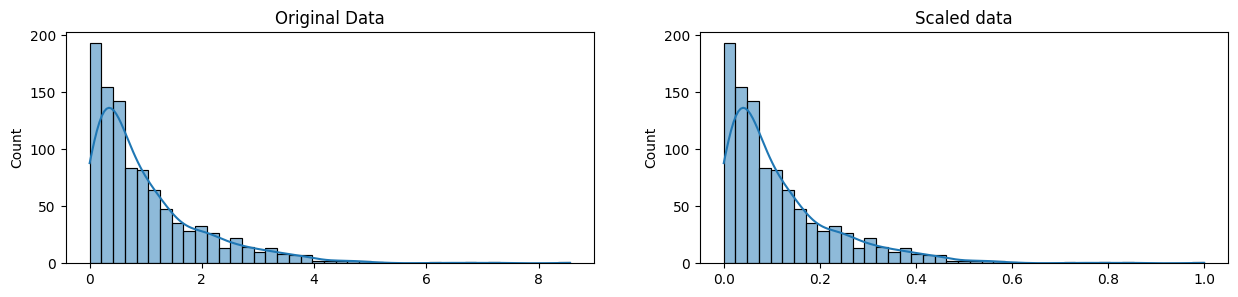

In [18]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

#### Normalization

Transforming the data to rescale observations so they fall within a specific range, such as [0, 1] or [-1, 1], to ensure consistent feature scaling for machine learning models.

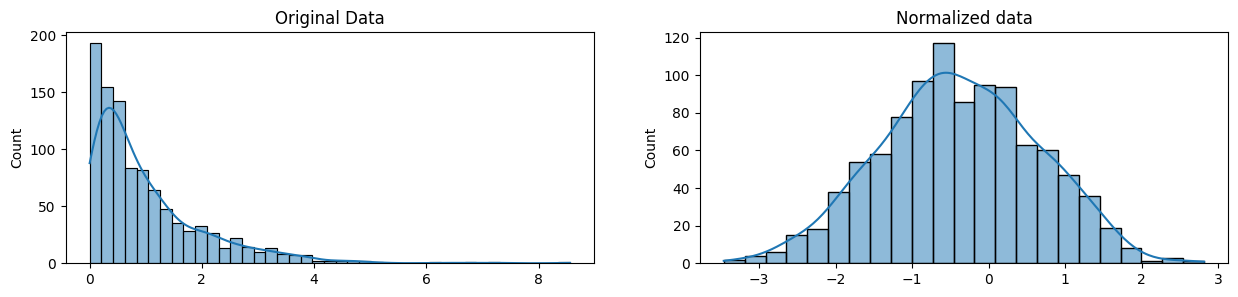

In [19]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

#### Exercise [Dataset](https://www.kaggle.com/datasets/kemical/kickstarter-projects)

In [20]:
kickstarters_2017 = pd.read_csv("dataset/ks-projects-201801.csv")

np.random.seed(0)

In [21]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [22]:
kickstarters_2017.shape

(378661, 15)

##### Scaling

In [23]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=["usd_goal_real"])

print(f"Original data\nPreview:\n {original_data.head()}")
print(
    f"Minimum value: {float(original_data.min())} \nMaximum value: {float(original_data.max())}"
)
print("_" * 30)

print(f"\nScaled data\nPreview:\n {scaled_data.head()}")
print(
    f"Minimum value: {float(scaled_data.min())} \nMaximum value: {float(scaled_data.max())}"
)

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


Scaling for "goal" column

In [24]:
# select the goal column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

# scale the goals from 0 to 1
scaled_goal_data = minmax_scaling(original_goal_data, columns=["goal"])

print(f"Original data\nPreview:\n {original_goal_data.head()}")
print(
    f"Minimum value: {float(original_goal_data.min())} \nMaximum value: {float(original_goal_data.max())}"
)
print("_" * 30)

print(f"\nScaled data\nPreview:\n {scaled_goal_data.head()}")
print(
    f"Minimum value: {float(scaled_goal_data.min())} \nMaximum value: {float(scaled_goal_data.max())}"
)

Original data
Preview:
       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Minimum value: 0.01 
Maximum value: 100000000.0
______________________________

Scaled data
Preview:
        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Minimum value: 0.0 
Maximum value: 1.0


##### Normalization

In [25]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(
    stats.boxcox(positive_pledges)[0],
    name="usd_pledged_real",
    index=positive_pledges.index,
)

print(f"Original data\nPreview:\n {positive_pledges.head()}")
print(
    f"Minimum value: {float(positive_pledges.min())} \nMaximum value: {float(positive_pledges.max())}"
)
print("_" * 30)

print(f"\nNormalized data\nPreview:\n {normalized_pledges.head()}")
print(
    f"Minimum value: {float(normalized_pledges.min())} \nMaximum value: {float(normalized_pledges.max())}"
)

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836852
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954154530838 
Maximum value: 30.690537060647134


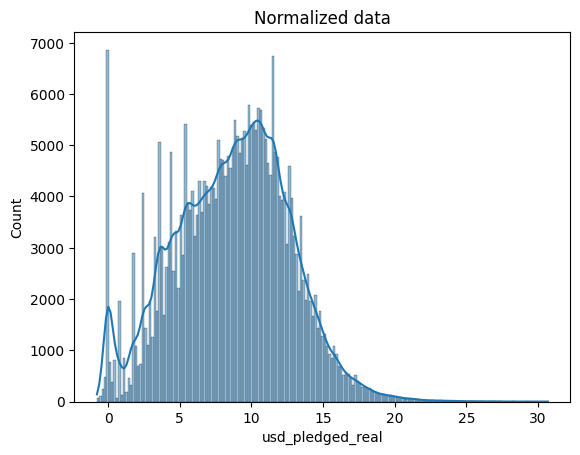

In [26]:
# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

For "Pledged" Column

In [27]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledged_col = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledged_col = kickstarters_2017.pledged.loc[index_of_positive_pledged_col]

# normalize the pledges (w/ Box-Cox)
normalized_pledged_col = pd.Series(
    stats.boxcox(positive_pledged_col)[0],
    name="pledges",
    index=positive_pledged_col.index,
)

print(f"Original data\nPreview:\n {positive_pledged_col.head()}")
print(
    f"Minimum value: {float(positive_pledged_col.min())} \nMaximum value: {float(positive_pledged_col.max())}"
)
print("_" * 30)

print(f"\nNormalized data\nPreview:\n {normalized_pledged_col.head()}")
print(
    f"Minimum value: {float(normalized_pledged_col.min())} \nMaximum value: {float(normalized_pledged_col.max())}"
)

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Minimum value: 1.0 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.013887
2     6.403368
3     0.000000
4     9.005193
5    15.499596
Name: pledges, dtype: float64
Minimum value: 0.0 
Maximum value: 29.630308617318825


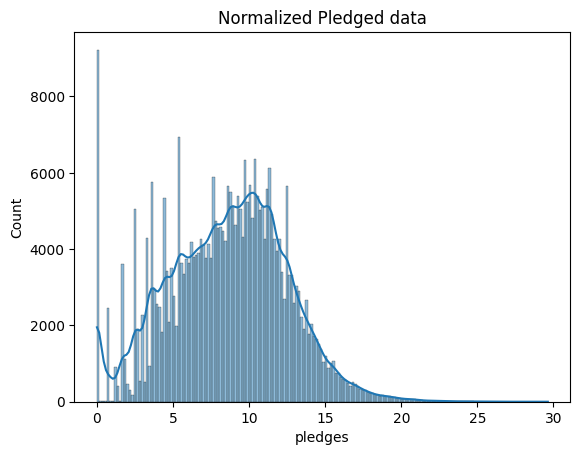

In [28]:
# plot normalized data
ax = sns.histplot(normalized_pledged_col, kde=True)
ax.set_title("Normalized Pledged data")
plt.show()

## Parsing Dates

In [29]:
earthquakes = pd.read_csv("dataset/database.csv")

In [30]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [31]:
earthquakes.Date.dtype # Object

dtype('O')

In [32]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()  # This will say how many unique format are available

"""
Output of above:
10    23409
24        3

So, the first line has '10' -- indicates, that there are 23409 dates with the length of 10
3 Dates which have a length of 24! This is not a common format, so we need to convert it.
"""

"\nOutput of above:\n10    23409\n24        3\n\nSo, the first line has '10' -- indicates, that there are 23409 dates with the length of 10\n3 Dates which have a length of 24! This is not a common format, so we need to convert it.\n"

In [33]:
indices = np.where([date_lengths == 24])[1]
print("Indices with corrupted data:", indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [34]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes["date_parsed"] = pd.to_datetime(earthquakes["Date"], format="%m/%d/%Y")

In [35]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes["date_parsed"].dt.day
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int32

<Axes: xlabel='date_parsed', ylabel='Count'>

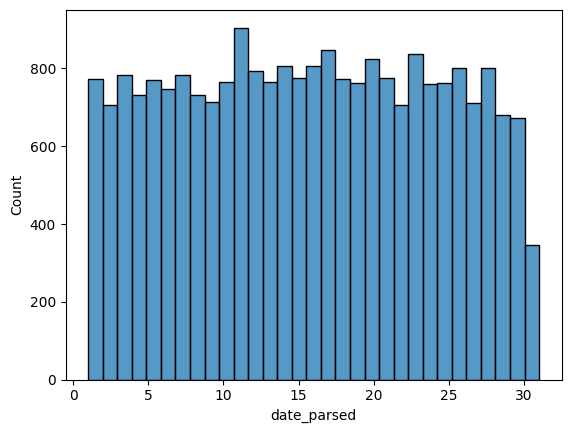

In [36]:
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.histplot(day_of_month_earthquakes, kde=False, bins=31)

Second dataset (Volcano's)

In [37]:
volcanos = pd.read_csv("dataset/database 2.csv")

In [38]:
volcanos.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [39]:
volcanos["Last Known Eruption"].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object

From the above, the "Last Known Eruption" field has BCE, CE, and Unknown from above view, so we need to have a common format.

In [40]:
lke_lengths = volcanos["Last Known Eruption"].str.len()
lke_lengths.value_counts()

Last Known Eruption
7    1312
8     129
6      62
5       3
9       1
4       1
Name: count, dtype: int64

In [41]:
indices = np.where([lke_lengths == 4])[1]
print("Indices with corrupted data:", indices)
volcanos.loc[indices]

Indices with corrupted data: [874]


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
874,305011,Arshan,China,Kamchatka and Mainland Asia,Pyroclastic cone(s),Eruption Dated,0 CE,47.5,120.7,0,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [42]:
indices = volcanos[volcanos["Last Known Eruption"] == "Unknown"].index
print(
    "Indices with corrupted data:", indices
)
volcanos.loc[indices]

Indices with corrupted data: Index([   2,    6,   12,   19,   24,   25,   26,   27,   28,   29,
       ...
       1487, 1490, 1493, 1494, 1495, 1501, 1502, 1505, 1506, 1507],
      dtype='int64', length=637)


,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
6,211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.730,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
12,211041,Panarea,Italy,Mediterranean and Western Asia,Stratovolcano,Evidence Uncertain,Unknown,38.638,15.064,399,Andesite / Basaltic Andesite,Subduction Zone / Continental Crust (>25 km)
19,211800,Amiata,Italy,Mediterranean and Western Asia,Lava dome(s),Unrest / Pleistocene,Unknown,42.900,11.630,1738,NaN,Subduction Zone / Continental Crust (>25 km)
24,212051,Yali,Greece,Mediterranean and Western Asia,Lava dome(s),Evidence Credible,Unknown,36.671,27.140,180,Rhyolite,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1501,390110,Hodson,United Kingdom,Antarctica,Stratovolcano,Evidence Credible,Unknown,-56.712,-27.176,835,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1502,390120,Leskov Island,United Kingdom,Antarctica,Stratovolcano,Unrest / Holocene,Unknown,-56.656,-28.140,190,Andesite / Basaltic Andesite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


<Axes: xlabel='Elevation (Meters)', ylabel='Type'>

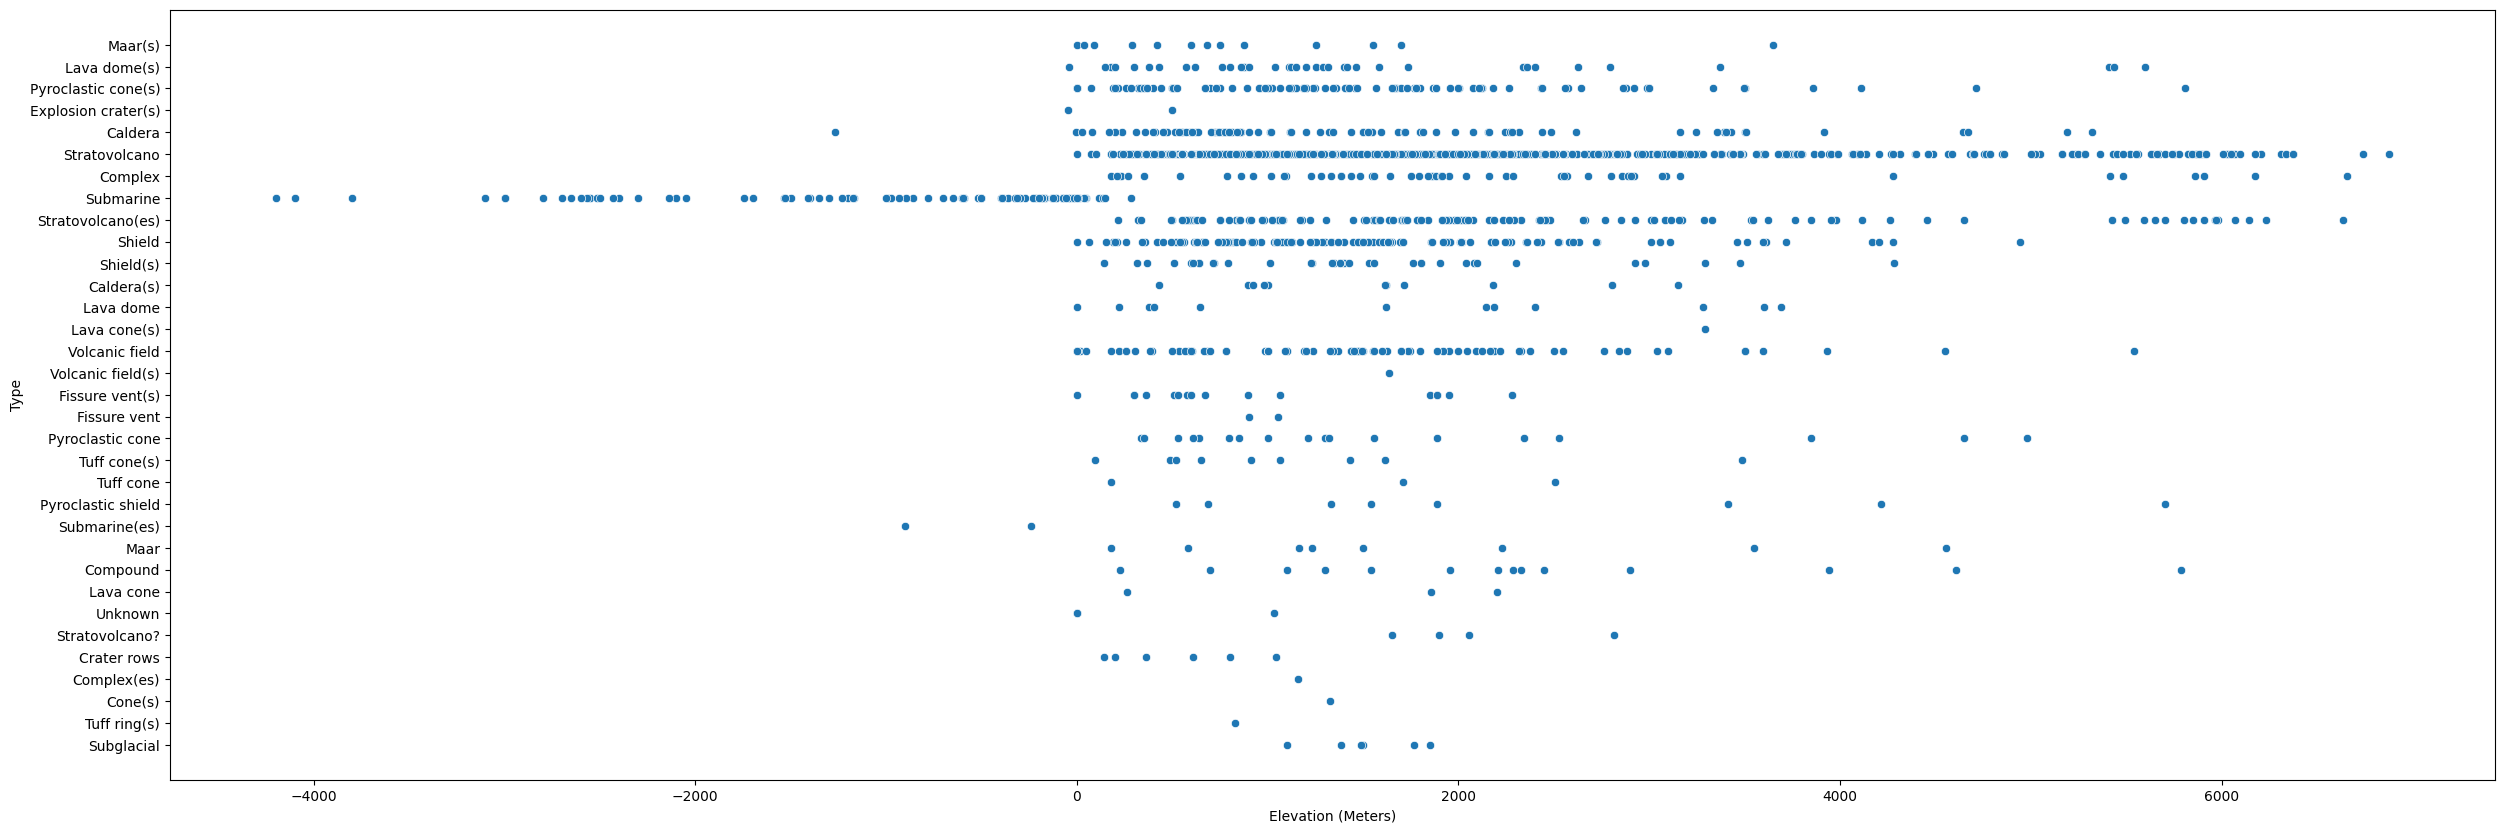

In [71]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data=volcanos, x='Elevation (Meters)', y='Type')

<Axes: xlabel='Dominant Rock Type', ylabel='Elevation (Meters)'>

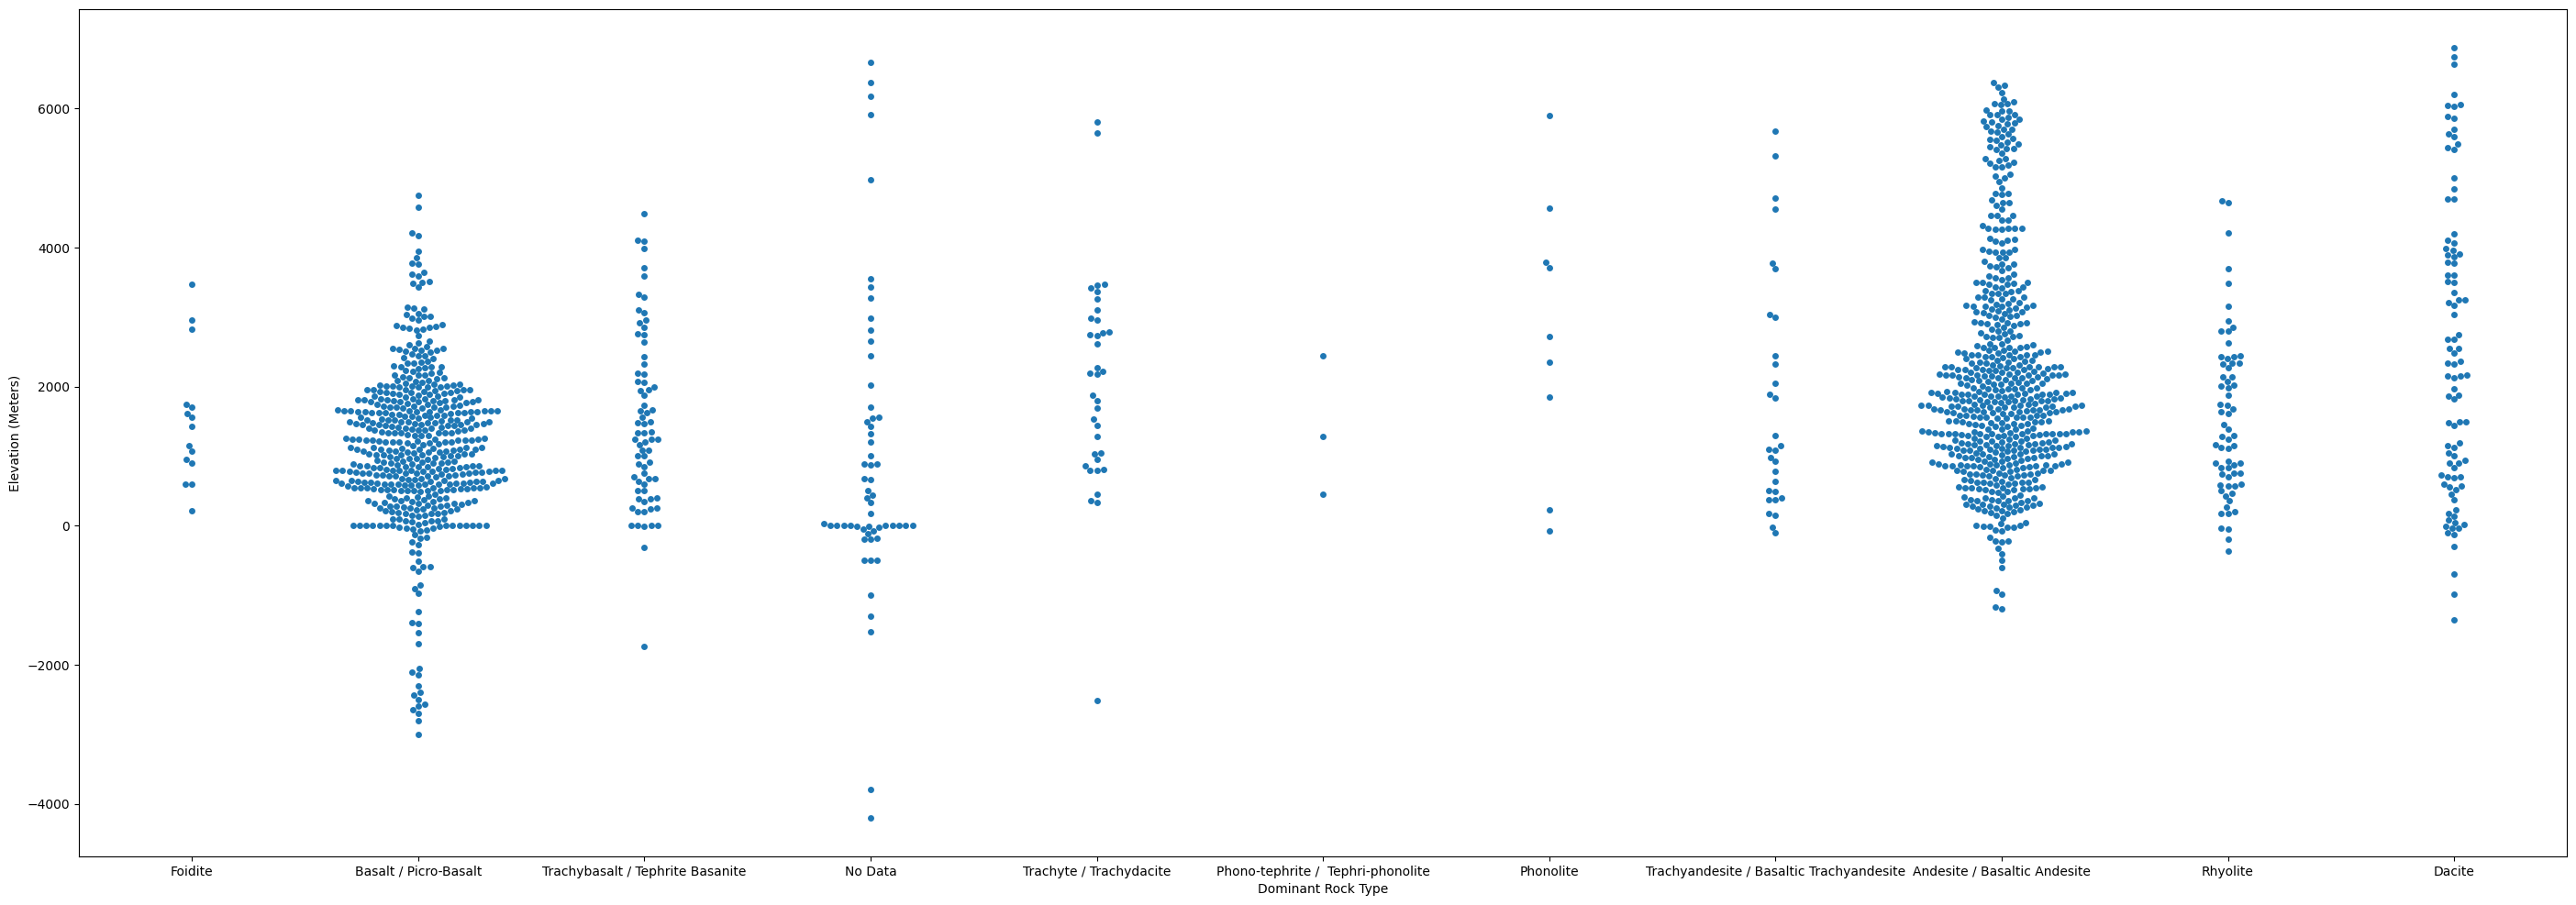

In [72]:
plt.figure(figsize=(35, 12))
sns.swarmplot(
    x=volcanos["Dominant Rock Type"], y=volcanos["Elevation (Meters)"]
)

<Axes: xlabel='Elevation (Meters)', ylabel='Density'>

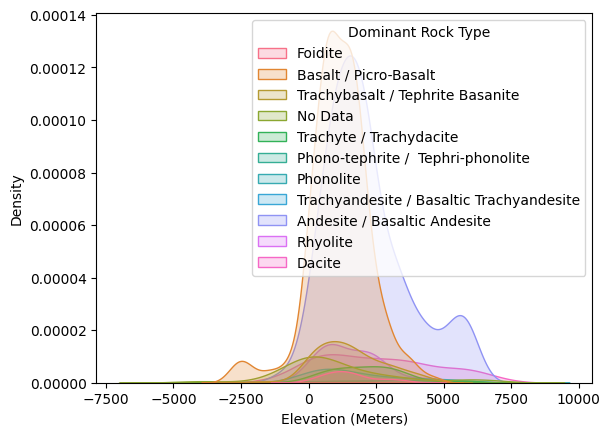

In [75]:
sns.kdeplot(data=volcanos, x="Elevation (Meters)", hue="Dominant Rock Type", fill=True)

## Character Encodings

[Dataset](https://www.kaggle.com/datasets/kwullum/fatal-police-shootings-in-the-us)

In [2]:
# helpful character encoding module
import charset_normalizer

In [3]:
sample_entry = b"\xa7A\xa6n"
print(sample_entry)
print("data type:", type(sample_entry))

b'\xa7A\xa6n'
data type: <class 'bytes'>


In [6]:
# Decode it first from "big5-tw" and Encode it to "utf-8"

decoded_entry = sample_entry.decode("big5-tw")
new_entry = decoded_entry.encode("utf-8")
new_entry

b'\xe4\xbd\xa0\xe5\xa5\xbd'

In [ ]:
police_killings = pd.read_csv(
    "dataset/fatal_police_shootings_in_the_usa/PoliceKillingsUS.csv"
)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 25272: invalid start byte

In [19]:
with open(
    "dataset/fatal_police_shootings_in_the_usa/PoliceKillingsUS.csv", "rb"
) as rawdata:
    result = charset_normalizer.detect(rawdata.read(100000))

# check what the character encoding might be
result

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}

In [20]:
police_killings = pd.read_csv(
    "dataset/fatal_police_shootings_in_the_usa/PoliceKillingsUS.csv",
    encoding="Windows-1250"
)

police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
# Saving "to_csv" will by default save it in "utf-8" standard
police_killings.to_csv("dataset/fatal_police_shootings_in_the_usa/PoliceKillingsUS_utf8.csv")

In [23]:
# Check reading it as regular Pandas Dataframe

police_killings_df = pd.read_csv("dataset/fatal_police_shootings_in_the_usa/PoliceKillingsUS_utf8.csv")

police_killings_df.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Inconsistent Data Entry

[Dataset](https://www.kaggle.com/datasets/alexisbcook/pakistan-intellectual-capital)

In [24]:
# modules we'll use
import pandas as pd

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# read in all our data
professors = pd.read_csv(
    "dataset/pakistan_intellectual_capital.csv"
)

# set seed for reproducibility
np.random.seed(0)

In [30]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [27]:
# convert to lower case
professors["Country"] = professors["Country"].str.lower()
# remove trailing white spaces
professors["Country"] = professors["Country"].str.strip()

# get the top 10 closest matches to "south korea"
countries = professors["Country"].unique()
matches = fuzzywuzzy.process.extract(
    "south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio
)

matches

[('south korea', 100),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('usofa', 25),
 ('macau', 25),
 ('france', 24)]

In [28]:
def replace_matches_in_column(df, column, string_to_match, min_ratio=47):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(
        string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio
    )

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")


replace_matches_in_column(
    df=professors, column="Country", string_to_match="south korea"
)
countries = professors["Country"].unique()

countries

All done!


array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'south korea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'macau', 'singapore', 'spain', 'japan',
       'hongkong', 'saudi arabia', 'mauritius', 'scotland'], dtype=object)

In [33]:
# get the top 10 closest matches to "south korea"
graduated_from = professors["Graduated from"].unique()
graduated_from

array(['Asian Institute of Technology',
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'University of Balochistan',
       "Sardar Bahadur Khan Women's University",
       'SRH Hochschule Heidelberg',
       'Institute of Business Administration,Karachi', 'DUET,Karachi',
       'University of Turbat', 'University of Vienna',
       'Monash University', 'University of Stirling',
       'Chinese Academy of Sciences', 'University of Innsbruck',
       'Vienna University of Technology', 'University of Paris-Est',
       'The University of Cambridge', 'Harbin Institute of Technology',
       'University of Nice, Sophia Antipolis', 'The University of York',
       'Galilée - Université Paris 13', 'University of Bedfordshire',
       'North Dakota State University', 'Kyungpook National University',
       'The University of Manchester',
       'National University of Sciences and Technology',
       'FAST– National University of Computer

In [38]:
# Remove white spaces
professors["Graduated from"] = professors["Graduated from"].str.strip()

In [46]:
# get all the unique values in the 'City' column
countries = professors["Country"].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [47]:
matches = fuzzywuzzy.process.extract(
    "usa", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio
)
replace_matches_in_column(
    df=professors, column="Country", string_to_match="usa", min_ratio=70
)

All done!


In [49]:
# get all the unique values in the 'City' column
countries = professors["Country"].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries # usofa has been removed

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa'],
      dtype=object)